# Decompose

In [1]:
import pandas as pd

dataset = pd.read_csv('smart_meters_london_2013.csv')
df = dataset.T

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df.columns = pd.to_datetime(df.iloc[0])
df = df[1:]

In [4]:
df.shape

(4125, 8760)

In [11]:
hour = pd.to_datetime(df.columns).hour
hours = set(hour)
hourly = np.zeros((df.shape[0], len(hours)))
for i, h in enumerate(hours):
    hourly[:,i] = df.iloc[:,hour == h].mean(axis=1)

In [12]:
day = pd.to_datetime(df.columns).dayofweek
days = set(day)
daily = np.zeros((df.shape[0], len(days)))
for i, d in enumerate(days):
    daily[:,i] = df.iloc[:,day == d].mean(axis=1)

In [13]:
month = pd.to_datetime(df.columns).month
months = set(month)
monthly = np.zeros((df.shape[0], len(months)))
for i, m in enumerate(months):
    monthly[:,i] = df.iloc[:,month == m].mean(axis=1)

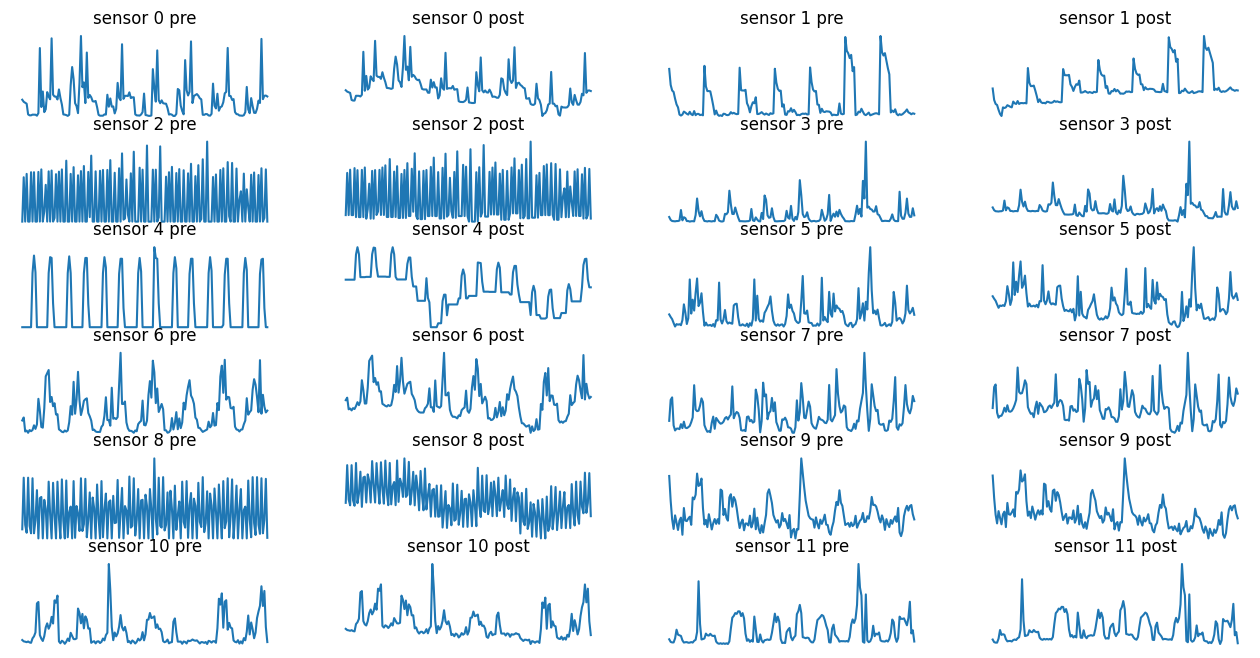

In [24]:
fig, ax = plt.subplots(nrows=6, ncols=4, sharex=True, figsize=(16,8))
for i in range(12):
    plt.subplot(6, 4, 2*i+1)
    plt.plot(df.iloc[i,:168].to_numpy())
    plt.axis('off')
    plt.title(f"sensor {i} pre")
    plt.subplot(6, 4, 2*i+2)
    plt.plot(df.iloc[i,:168].to_numpy() - np.repeat(hourly[i], 7))
    plt.axis('off')
    plt.title(f"sensor {i} post")